
## CMSC641 Project 2

### Mahdi Navari
In this project you will apply your data wrangling and exploratory data analysis
skills to baseball data. In particular, we want to know how well did Moneyball 
work for the Oakland A's. Was it worthy of a movie?

#### The Question
We want to understand how efficient teams have been historically at spending 
money and getting wins in return. In the case of Moneyball, one would expect 
that Oakland was not much more efficient than other teams in their spending 
before 2000, were much more efficient (they made a movie about it after all) 
between 2000 and 2005, and by then other teams may have caught up. Your job 
in this project is to see how this is reflected in the data we have.

In [1]:
import sqlite3
import pandas
import numpy as np

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries.head()

,yearID,total_payroll
0,1985,134401120.0
1,1986,157716444.0
2,1987,136088747.0
3,1988,157049812.0
4,1989,188771688.0


### Part 1: Wrangling
The data you need to answer these questions is in the Salaries and Teams tables of the database.

Problem 1

Using SQL compute a relation containing the total payroll and winning percentage 
(number of wins / number of games * 100) for each team (that is, for each teamID 
and yearID combination). You should include other columns that will help when 
performing EDA later on (e.g., franchise ids, number of wins, number of games).

Include the SQL code you used to create this relation in your writeup. Describe 
how you dealt with any missing data in these two relations. Specifically, indicate 
if there is missing data in either table, and how the type of join you used determines 
how you dealt with this missing data. One note, for SQL you have to be mindful of integer 
vs. float division.

In [2]:
# import `pandas` and `sqlite3`
import pandas as pd
import numpy as np
import sqlite3

# Connecting to SQLite Database
conn = sqlite3.connect('lahman2014.sqlite')


Teams_query = "SELECT * from Teams WHERE lgID == 'AL'"

Teams_df = pandas.read_sql(Teams_query, conn)
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro']
Teams_df.columns = cols

# Print the first rows of `teams_df`
Teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1901,AL,BLA,NYY,None,5,135,66,68,65,...,76,0.92,Baltimore Orioles,Oriole Park,141952,104,105,BLA,BLA,BLA
1,1901,AL,BOS,BOS,None,2,138,69,79,57,...,104,0.94,Boston Americans,Huntington Avenue Grounds,289448,98,96,BOS,BOS,BOS
2,1901,AL,CHA,CHW,None,1,137,71,83,53,...,100,0.94,Chicago White Sox,South Side Park II,354350,97,95,CHW,CHA,CHA
3,1901,AL,CLE,CLE,None,7,138,69,54,82,...,99,0.94,Cleveland Blues,League Park I,131380,96,97,CLE,CLE,CLE
4,1901,AL,DET,DET,None,3,136,70,74,61,...,127,0.93,Detroit Tigers,Bennett Park,259430,105,105,DET,DET,DET


In [31]:

Salaries_query = "SELECT * from Salaries where lgId = 'AL'"

Salaries = pandas.read_sql(Salaries_query, conn)
Salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,boddimi01,625000.0
1,1985,BAL,AL,dauerri01,480000.0
2,1985,BAL,AL,davisst02,437500.0
3,1985,BAL,AL,dempsri01,512500.0
4,1985,BAL,AL,dwyerji01,375000.0


In [32]:
TeamsFranchises_query = "SELECT * from TeamsFranchises"

TeamsFranchises = pandas.read_sql(TeamsFranchises_query, conn)
TeamsFranchises.head()

,franchID,franchName,active,NAassoc
0,ALT,Altoona Mountain City,N,None
1,ANA,Los Angeles Angels of Anaheim,Y,None
2,ARI,Arizona Diamondbacks,Y,None
3,ATH,Philadelphia Athletics,N,PNA
4,ATL,Atlanta Braves,Y,BNA


In [81]:
Salaries_query = "SELECT * from Salaries where lgId = 'AL'"

Salaries = pandas.read_sql(Salaries_query, conn)
Salaries.head()


,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,boddimi01,625000.0
1,1985,BAL,AL,dauerri01,480000.0
2,1985,BAL,AL,davisst02,437500.0
3,1985,BAL,AL,dempsri01,512500.0
4,1985,BAL,AL,dwyerji01,375000.0


#### Part 1 problem 1
Using SQL compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). You should include other columns that will help when performing EDA later on (e.g., franchise ids, number of wins, number of games).

Describe how you dealt with any missing data in these two relations. Specifically, indicate if there is missing data in either table, and how the type of join you used determines how you dealt with this missing data. One note, for SQL you have to be mindful of integer vs. float division.
 
<font color='blue'>There was no missing data. There is salary data from 1985 where as we have data on teams since 1871, therefore there will be no data for all of the teams from 1871 to 1984 when we join Teams with total team payrolls</font>




In [3]:
Team_Salaries_query =  ''' with total_payroll as
      (SELECT teamID, yearID, sum(salary) as payroll
      FROM Salaries
      GROUP BY teamID, yearID)
    SELECT Teams.teamID,
          Teams.yearID,
          Teams.lgID,
          payroll,
          franchID,
          rank, W,G, ((W*1.0/G)*100) as win_percentage
    FROM total_payroll, Teams
    WHERE total_payroll.yearID = Teams.yearID and
          total_payroll.teamID = Teams.teamID and
           lgId = 'AL' '''
df = pandas.read_sql(Team_Salaries_query, conn)
df.head()


,teamID,yearID,lgID,payroll,franchID,Rank,W,G,win_percentage
0,BAL,1985,AL,11560712.0,BAL,4,83,161,51.552795
1,BOS,1985,AL,10897560.0,BOS,5,81,163,49.693252
2,CAL,1985,AL,14427894.0,ANA,2,90,162,55.555556
3,CHA,1985,AL,9846178.0,CHW,3,85,163,52.147239
4,CLE,1985,AL,6551666.0,CLE,7,60,162,37.037037


In [4]:
grouped = df.groupby(['teamID'])['win_percentage', 'payroll'].mean()
#grouped['win_percentage'] = grouped['win_percentage'].astype('float64') 
grouped = grouped.sort_values(['win_percentage'], ascending = False )
grouped

,win_percentage,payroll
teamID,,
NYA,56.571125,1.094373e+08
LAA,55.925926,1.184672e+08
BOS,53.691811,8.109003e+07
OAK,52.754727,3.955182e+07
ANA,51.234568,5.851150e+07
TOR,51.202507,5.236251e+07
CHA,50.860775,5.666217e+07
CLE,50.015498,4.683387e+07
TEX,49.955847,5.566968e+07


### Part 2: Exploratory Data Analysis 
#### Payroll Distribution

#### Problem 2

Write code to produce plots that illustrate the distribution of payrolls across
teams conditioned on time (from 1990-2014).

#### Question 1

What statements can you make about the distribution of payrolls conditioned on time
based on these plots? Remember you can make statements in terms of central tendency,
spread, etc.

<font color='blue'>As shown in this figure over the time spread of the distribution of the payroll significantly increases. Especially since 2000 the difference between the wealthiest and the poorest team increases. </font>



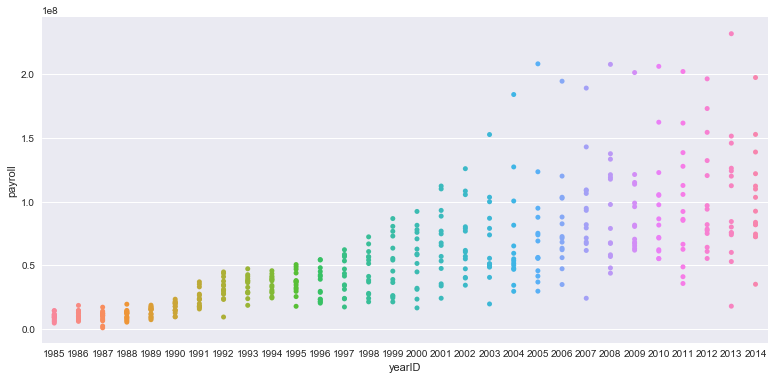

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 6))
sns.stripplot(x=df.yearID, y=df.payroll);


In [6]:
stat = pd.DataFrame()
stat['mean_payroll'] = df.groupby('yearID')['payroll'].mean()
stat['std_payroll']= df.groupby('yearID')['payroll'].std()
stat.head()


,mean_payroll,std_payroll
yearID,,
1985,9.600080e+06,2.873861e+06
1986,1.126546e+07,3.428311e+06
1987,9.720625e+06,4.380802e+06
1988,1.121784e+07,3.777203e+06
1989,1.348369e+07,3.753311e+06


#### Problem 3

Write code to produce plots that specifically show at least one of the statements 
you made in Question 1. For example, if you make a statement that there is a trend 
for payrolls to decrease over time, make a plot of a statistic for central tendency
(e.g., mean payroll) vs. time to show that specficially.


<font color='blue'>The following figure shows the mean and one standard deviation around the mean for the payroll over the time. As can be seen, the mean payroll has been increased from about 10M dollar to about 100M dollar and the spread $ \mp  \sigma $ around the mean increased from about 5M dollar to about 500M dollar.  </font>




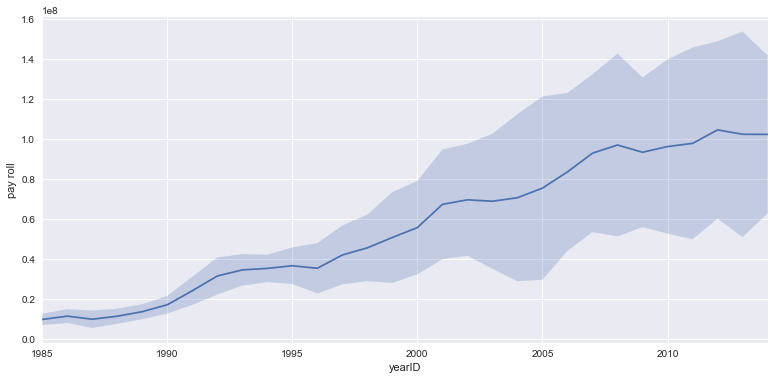

In [7]:
plt.figure(figsize=(13, 6))

ax = stat['mean_payroll'].plot()
ax.fill_between(stat.index, stat['mean_payroll'] - stat['std_payroll'], stat['mean_payroll'] + stat['std_payroll'],
                alpha=.25)
#plt.tight_layout()
plt.ylabel("pay roll")
sns.despine()


### Correlation between payroll and winning percentage

#### Problem 4

Write code to discretize year into five time periods (you can use pandas.cut to 
accomplish this) and then make a scatterplot showing mean winning percentage (y-axis)
vs. mean payroll (x-axis) for each of the five time periods. You could add a regression
line (using, e.g., NumPy's polyfit) in each scatter plot to ease interpretation.

#### Question 2

What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A's spending efficiency across these time periods (labeling points in the scatterplot can help interpretation).


<font color='blue'>Since all figures are plotted on the same scale we can see that over the time the slope of the fitting line has been decreased that means the sensitivity of the winning rate to the payroll has been decreased over time. </font>



In [8]:
bins = [1984, 1990, 1996, 2002, 2008, 2014]
df['yearBinned'] = pd.cut(df['yearID'], bins)
df.head()

,teamID,yearID,lgID,payroll,franchID,Rank,W,G,win_percentage,yearBinned
0,BAL,1985,AL,11560712.0,BAL,4,83,161,51.552795,"(1984, 1990]"
1,BOS,1985,AL,10897560.0,BOS,5,81,163,49.693252,"(1984, 1990]"
2,CAL,1985,AL,14427894.0,ANA,2,90,162,55.555556,"(1984, 1990]"
3,CHA,1985,AL,9846178.0,CHW,3,85,163,52.147239,"(1984, 1990]"
4,CLE,1985,AL,6551666.0,CLE,7,60,162,37.037037,"(1984, 1990]"


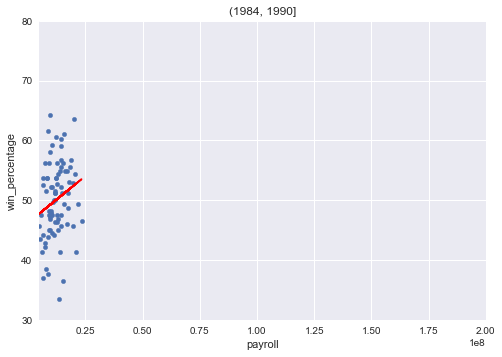

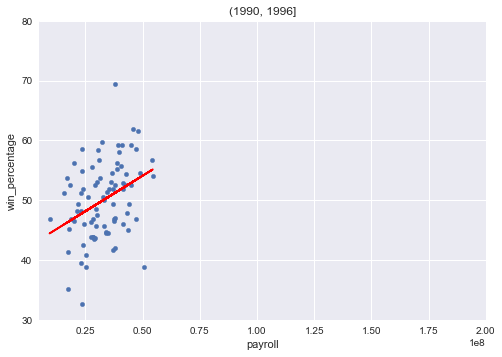

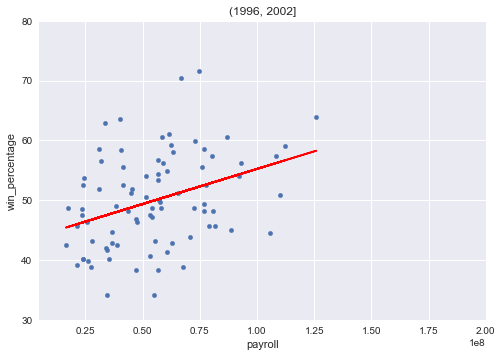

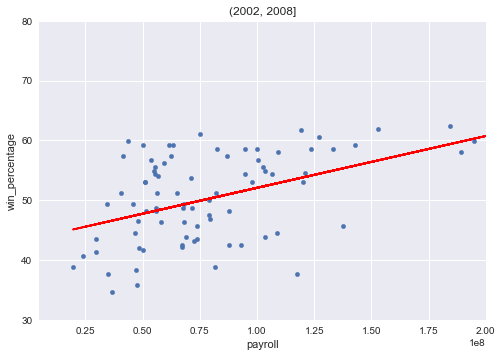

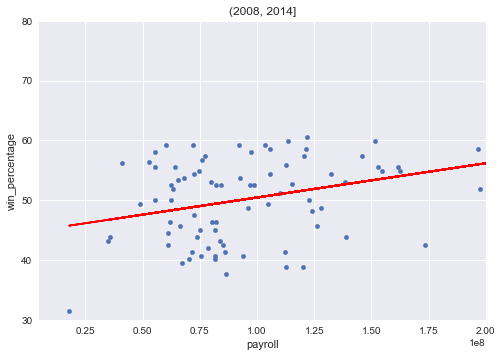

In [15]:
import matplotlib.pyplot as plt
from scipy import stats

for title, group in df.groupby('yearBinned'):
    group.plot(kind='scatter',x='payroll', y='win_percentage', title=title)
    plt.xlim(5000000, 200000000)
    plt.ylim(30,80)
    x = group.payroll
    y = group.win_percentage
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, intercept + slope*x, 'r')
    

### Part 3: Data transformations

#### Standardizing across years

It looks like comparing payrolls across years is problematic so let's do a 
transformation that will help with these comparisons.

#### Problem 5

Create a new variable in your dataset that standardizes payroll conditioned on year. 
So, this column for team i in year j should equal:




In [17]:
stat.head()
#stat['yearID'] = stat.index
stat.reset_index(level=0, inplace=True)
stat.head()

,yearID,mean_payroll,std_payroll
0,1985,9.600080e+06,2.873861e+06
1,1986,1.126546e+07,3.428311e+06
2,1987,9.720625e+06,4.380802e+06
3,1988,1.121784e+07,3.777203e+06
4,1989,1.348369e+07,3.753311e+06


In [18]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
yearID          30 non-null int64
mean_payroll    30 non-null float64
std_payroll     30 non-null float64
dtypes: float64(2), int64(1)
memory usage: 800.0 bytes


In [19]:
def mormaliz_payroll(df1 ,df2):
    normalized_payroll = []
    for i in range  (len(df1)):
        year = df1.yearID[i]
        idx = df2.yearID[df2.yearID == year].index.tolist()
        normalized_payroll.append((df1.payroll[i] - df2.mean_payroll[idx[0]]) / df2.std_payroll[idx[0]])
        #print(year , idx[0],df.payroll[i],tmp , stat.mean_payroll[idx[0]], stat.std_payroll[idx[0]])
    return  normalized_payroll  

In [20]:
tmp =  mormaliz_payroll(df ,stat)
df['normalized_payroll'] = np.asarray(tmp)
df.head()

,teamID,yearID,lgID,payroll,franchID,Rank,W,G,win_percentage,yearBinned,normalized_payroll
0,BAL,1985,AL,11560712.0,BAL,4,83,161,51.552795,"(1984, 1990]",0.682229
1,BOS,1985,AL,10897560.0,BOS,5,81,163,49.693252,"(1984, 1990]",0.451476
2,CAL,1985,AL,14427894.0,ANA,2,90,162,55.555556,"(1984, 1990]",1.679905
3,CHA,1985,AL,9846178.0,CHW,3,85,163,52.147239,"(1984, 1990]",0.085633
4,CLE,1985,AL,6551666.0,CLE,7,60,162,37.037037,"(1984, 1990]",-1.060738


#### Problem 6

Repeat the same plots as Problem 4, but use this new standardized payroll variable.

#### Question 3

Discuss how the plots from Problem 4 and Problem 6 reflect the transformation you did on the payroll variable.




<font color='blue'>I have computed the R-squred and slop of the fitting line <br>
r-squared: 0.090335710492 slop: 1.96283911671 <br>
r-squared: 0.148544070314 slop: 2.57891267643 <br>
r-squared: 0.180375817721 slop: 3.46131168804 <br>
r-squared: 0.228486509129 slop: 3.79678479541 <br>
r-squared: 0.131608373506 slop: 2.61789753339 <br>
 
the R_squred is very low and slope of the line gradually increases and then decreases it is very difficult to draw any conclusion based on this statistics. 
</font>




In [21]:
bins = [1984, 1990, 1996, 2002, 2008, 2014]
df['yearBinned'] = pd.cut(df['yearID'], bins)
df.head()

,teamID,yearID,lgID,payroll,franchID,Rank,W,G,win_percentage,yearBinned,normalized_payroll
0,BAL,1985,AL,11560712.0,BAL,4,83,161,51.552795,"(1984, 1990]",0.682229
1,BOS,1985,AL,10897560.0,BOS,5,81,163,49.693252,"(1984, 1990]",0.451476
2,CAL,1985,AL,14427894.0,ANA,2,90,162,55.555556,"(1984, 1990]",1.679905
3,CHA,1985,AL,9846178.0,CHW,3,85,163,52.147239,"(1984, 1990]",0.085633
4,CLE,1985,AL,6551666.0,CLE,7,60,162,37.037037,"(1984, 1990]",-1.060738


r-squared: 0.0903357104918 slop: 1.96283911671
r-squared: 0.148544070314 slop: 2.57891267643
r-squared: 0.180375817721 slop: 3.46131168804
r-squared: 0.228486509129 slop: 3.79678479541
r-squared: 0.131608373506 slop: 2.61789753339


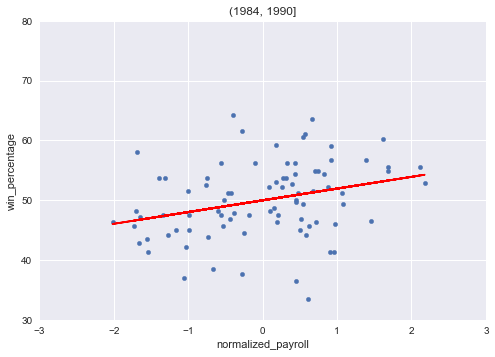

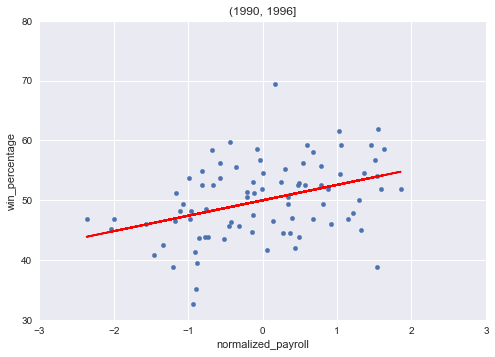

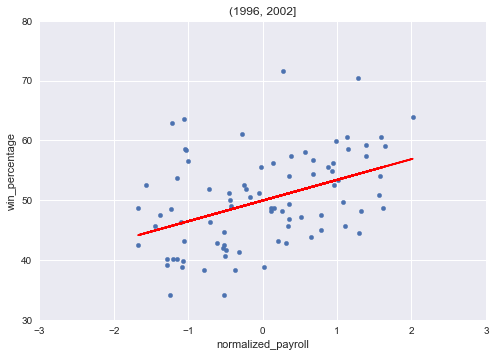

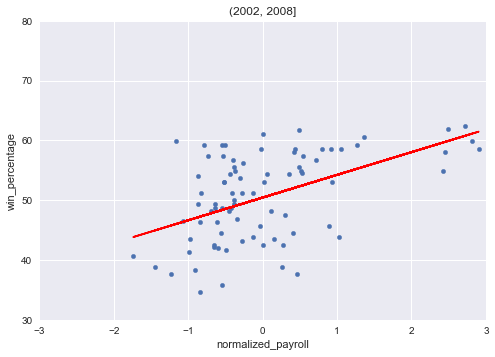

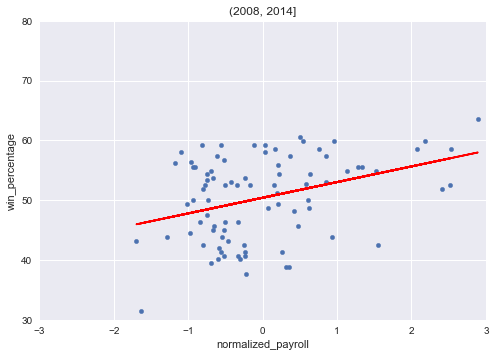

In [27]:
import matplotlib.pyplot as plt

for title, group in df.groupby('yearBinned'):
    group.plot(kind='scatter',x='normalized_payroll', y='win_percentage', title=title)
    plt.xlim(-3, 3)
    plt.ylim(30,80)
    x = group.normalized_payroll
    y = group.win_percentage
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, intercept + slope*x, 'r')
    print("r-squared:", r_value**2 , "slop:", slope)
    #print("slop:", slope)